In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
from sklearn.datasets import load_diabetes

In [7]:
X,y = load_diabetes(return_X_y=True)

In [9]:
X

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [10]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [11]:
X.shape

(442, 10)

In [12]:
y.shape

(442,)

## Train test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=2)

In [17]:
print(x_train.shape)
print(x_test.shape)

(353, 10)
(89, 10)


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [19]:
reg=LinearRegression()

In [20]:
model1=reg.fit(x_train,y_train)

In [22]:
y_pred1=reg.predict(x_test)

In [25]:
r2_score(y_test,y_pred1)

0.4399387660024644

In [26]:
model1.coef_

array([  -9.16088483, -205.46225988,  516.68462383,  340.62734108,
       -895.54360867,  561.21453306,  153.88478595,  126.73431596,
        861.12139955,   52.41982836])

In [27]:
model1.intercept_

151.88334520854633

In [41]:
y_pred1

array([154.1235067 , 204.81721599, 124.92988001, 106.09339576,
       258.53035681, 256.32953702, 118.75258786, 119.52147402,
       101.50717468, 190.54137158, 141.70360267, 172.51631204,
       174.34089304, 134.81184017, 294.13950798,  94.11403289,
       211.97052873, 156.49984762, 134.20709632, 119.62534726,
       148.88045343, 165.00378118, 151.09977307, 176.03719872,
       133.27651748, 221.29531227, 197.17482787,  96.15923158,
        50.26531577, 230.48342249, 242.06266394, 114.1153262 ,
        67.0785352 ,  94.53179042, 201.21593262, 167.05306138,
       159.87838519, 192.78601513, 114.49291816, 233.4825497 ,
       140.82309666, 121.06814332, 192.27431013, 191.13157307,
       179.1698153 , 148.35140027, 163.47610288, 276.81203359,
       100.17813072, 164.11265163, 255.81074398, 136.94979051,
       152.37507828, 107.92662528, 194.21661635,  77.35015426,
       118.50951725,  68.38527563, 154.29094022, 162.48905632,
       168.36590928, 156.8764705 ,  97.13958436, 238.17

## Making Our OWN Linear Regression class

In [37]:
class MeraLR:
    def __init__(self):
        self.coef_=None
        self.intercept_ = None
        
        
    def fit(self,x_train,y_train):
        x_train=np.insert(x_train,0,1,axis=1)
        #calculate the coefficients
        betas=np.linalg.inv(np.dot(x_train.T,x_train)).dot(x_train.T).dot(y_train)
        self.intercept_=betas[0]
        self.coef_=betas[1:]
        print(betas)
    
    
    
    def predict(self,x_test):
        y_pred= np.dot(x_test,self.coef_) + self.intercept_
        return y_pred
    
    

In [38]:
LR=MeraLR()

In [39]:
LR.fit(x_train,y_train)

[ 151.88334521   -9.16088483 -205.46225988  516.68462383  340.62734108
 -895.54360867  561.21453306  153.88478595  126.73431596  861.12139955
   52.41982836]


In [40]:
LR.predict(x_test)

array([154.1235067 , 204.81721599, 124.92988001, 106.09339576,
       258.53035681, 256.32953702, 118.75258786, 119.52147402,
       101.50717468, 190.54137158, 141.70360267, 172.51631204,
       174.34089304, 134.81184017, 294.13950798,  94.11403289,
       211.97052873, 156.49984762, 134.20709632, 119.62534726,
       148.88045343, 165.00378118, 151.09977307, 176.03719872,
       133.27651748, 221.29531227, 197.17482787,  96.15923158,
        50.26531577, 230.48342249, 242.06266394, 114.1153262 ,
        67.0785352 ,  94.53179042, 201.21593262, 167.05306138,
       159.87838519, 192.78601513, 114.49291816, 233.4825497 ,
       140.82309666, 121.06814332, 192.27431013, 191.13157307,
       179.1698153 , 148.35140027, 163.47610288, 276.81203359,
       100.17813072, 164.11265163, 255.81074398, 136.94979051,
       152.37507828, 107.92662528, 194.21661635,  77.35015426,
       118.50951725,  68.38527563, 154.29094022, 162.48905632,
       168.36590928, 156.8764705 ,  97.13958436, 238.17

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


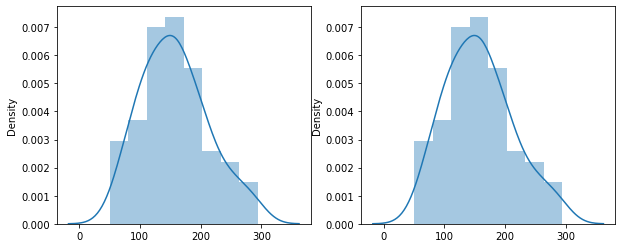

In [47]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(y_pred1)
plt.subplot(1,2,2)
sns.distplot(LR.predict(x_test))
plt.show()

## Sklearn Linear regression class and MeraLR(own LR class) o/p is same